In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("noones_p2p_data.csv")

df.head()

,user_id,country,account_age_days,trades_made,successful_trades,cancelled_trades,avg_trade_value,app_logins,referrals,has_shop,giftcard_trades,wallet_balance,satisfaction_score,churned
0,user_1,Nigeria,303,5,3,2,268.24,83,0,0,0,386.66,3.363648,0
1,user_2,Cameroon,12,3,2,1,175.09,28,2,0,0,33.88,3.959080,0
2,user_3,Kenya,318,5,4,1,245.45,30,0,1,2,453.91,4.886661,0
3,user_4,Ghana,80,7,4,3,244.30,94,0,0,3,140.83,2.794249,1
4,user_5,Nigeria,216,5,2,3,65.06,94,0,0,2,449.44,3.034486,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1000 non-null   object 
 1   country             1000 non-null   object 
 2   account_age_days    1000 non-null   int64  
 3   trades_made         1000 non-null   int64  
 4   successful_trades   1000 non-null   int64  
 5   cancelled_trades    1000 non-null   int64  
 6   avg_trade_value     1000 non-null   float64
 7   app_logins          1000 non-null   int64  
 8   referrals           1000 non-null   int64  
 9   has_shop            1000 non-null   int64  
 10  giftcard_trades     1000 non-null   int64  
 11  wallet_balance      1000 non-null   float64
 12  satisfaction_score  1000 non-null   float64
 13  churned             1000 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 109.5+ KB


In [3]:
df.describe()

,account_age_days,trades_made,successful_trades,cancelled_trades,avg_trade_value,app_logins,referrals,has_shop,giftcard_trades,wallet_balance,satisfaction_score,churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,183.384000,4.937000,3.968000,0.969000,156.992590,51.488000,0.505000,0.217000,1.992000,242.948410,3.522556,0.2000
std,107.100696,2.212674,2.371624,0.976213,84.645048,27.608406,0.732469,0.412409,1.367408,143.550662,0.874981,0.4002
min,1.000000,0.000000,0.000000,0.000000,10.390000,5.000000,0.000000,0.000000,0.000000,0.210000,1.000000,0.0000
25%,90.000000,3.000000,2.000000,0.000000,86.442500,26.000000,0.000000,0.000000,1.000000,115.087500,2.901588,0.0000
50%,178.000000,5.000000,4.000000,1.000000,155.750000,52.000000,0.000000,0.000000,2.000000,245.465000,3.512158,0.0000
75%,280.250000,6.000000,5.000000,2.000000,231.180000,76.000000,1.000000,0.000000,3.000000,364.080000,4.146552,0.0000
max,364.000000,15.000000,15.000000,5.000000,299.920000,99.000000,4.000000,1.000000,9.000000,499.360000,5.000000,1.0000


In [6]:
# Replace zero trades with NaN to avoid divide errors
df['success_rate'] = np.where(df['trades_made'] > 0,
                              df['successful_trades'] / df['trades_made'], 
                              np.nan)

In [8]:
# Engagement Index (weighted activity measure)
df['engagement_index'] = (
    df['app_logins'] * 0.4 +
    df['referrals'] * 0.3 +
    df['giftcard_trades'] * 0.3
)

In [9]:
df.head()

,user_id,country,account_age_days,trades_made,successful_trades,cancelled_trades,avg_trade_value,app_logins,referrals,has_shop,giftcard_trades,wallet_balance,satisfaction_score,churned,success_rate,engagement_index
0,user_1,Nigeria,303,5,3,2,268.24,83,0,0,0,386.66,3.363648,0,0.600000,33.2
1,user_2,Cameroon,12,3,2,1,175.09,28,2,0,0,33.88,3.959080,0,0.666667,11.8
2,user_3,Kenya,318,5,4,1,245.45,30,0,1,2,453.91,4.886661,0,0.800000,12.6
3,user_4,Ghana,80,7,4,3,244.30,94,0,0,3,140.83,2.794249,1,0.571429,38.5
4,user_5,Nigeria,216,5,2,3,65.06,94,0,0,2,449.44,3.034486,0,0.400000,38.2


In [12]:
# Simplify country names for charts
df['country'] = df['country'].astype('category')

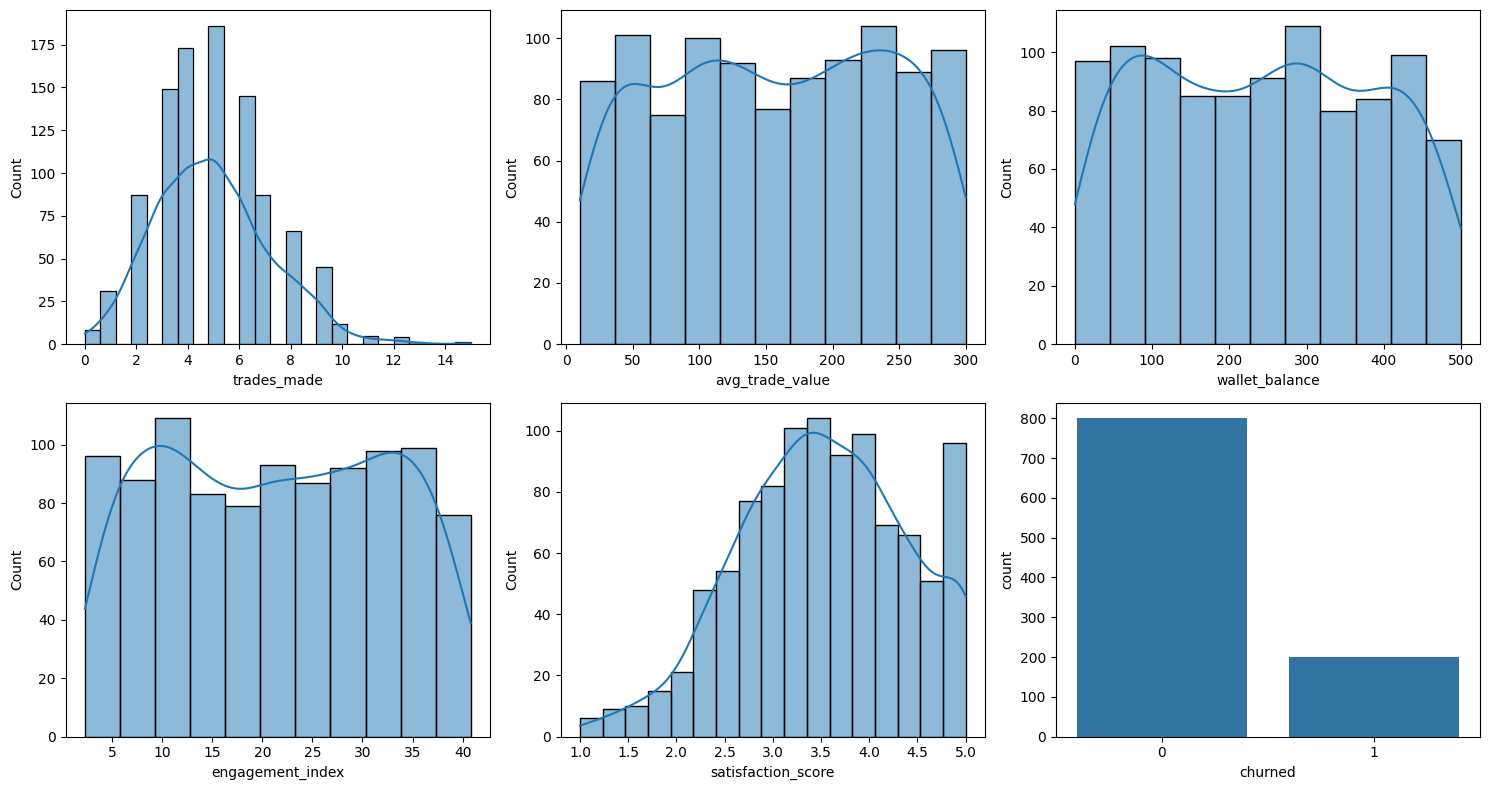

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.histplot(df['trades_made'], ax=axes[0,0], kde=True)
sns.histplot(df['avg_trade_value'], ax=axes[0,1], kde=True)
sns.histplot(df['wallet_balance'], ax=axes[0,2], kde=True)
sns.histplot(df['engagement_index'], ax=axes[1,0], kde=True)
sns.histplot(df['satisfaction_score'], ax=axes[1,1], kde=True)
sns.countplot(x='churned', data=df, ax=axes[1,2])
plt.tight_layout()
plt.show()

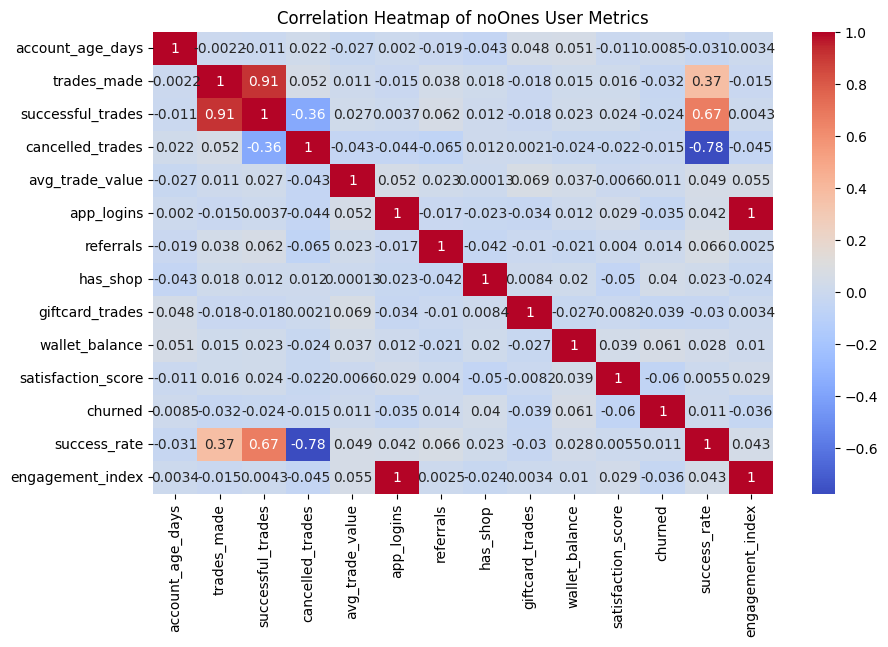

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of noOnes User Metrics")
plt.show()

C:\Users\pelic\AppData\Local\Temp\ipykernel_16716\1353648679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_summary = df.groupby('country')[['trades_made','engagement_index','churned']].mean().reset_index()


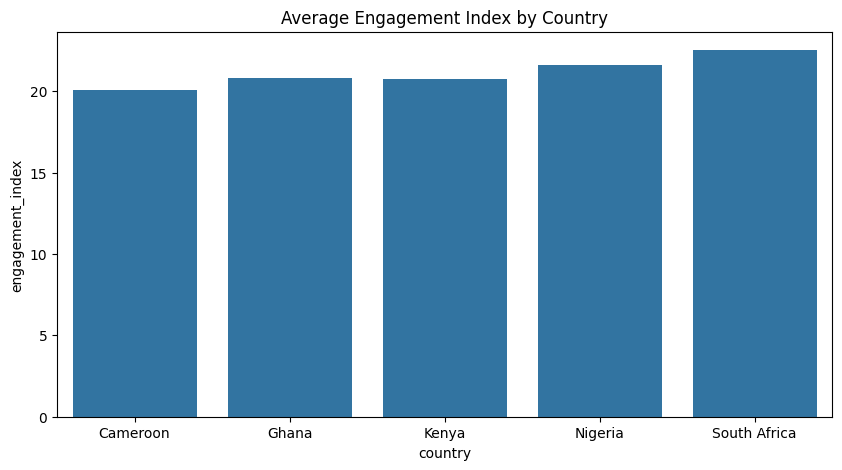

In [16]:
country_summary = df.groupby('country')[['trades_made','engagement_index','churned']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=country_summary, x='country', y='engagement_index')
plt.title('Average Engagement Index by Country')
plt.show()

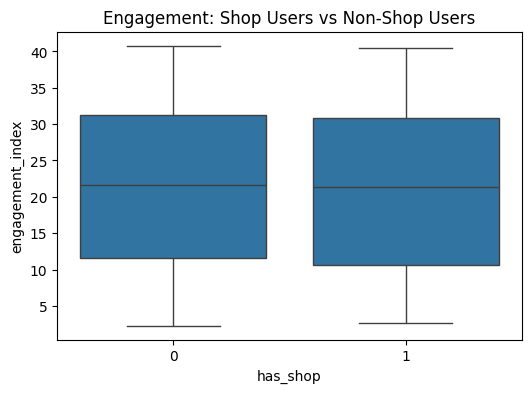

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='has_shop', y='engagement_index')
plt.title("Engagement: Shop Users vs Non-Shop Users")
plt.show()

#### Nigerian & SA users show the highest engagement and trade volume.

#### The engagement index among shop owners is nearly identical to that of non-shop users.

#### Users with higher satisfaction scores are less likely to churn.

#### Wallet balance and engagement index are the top predictors of activity

In [25]:
# ==========================
# Handle Missing Values Safely
# ==========================

# Check missing values
print("🔍 Missing values before cleaning:")
print(X.isna().sum())

# Fill numeric columns with median
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X.loc[:, num_cols] = X[num_cols].fillna(X[num_cols].median())

# Fill categorical/boolean columns (only if they exist)
cat_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(cat_cols) > 0:
    X.loc[:, cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

print("\n✅ Missing values after cleaning:")
print(X.isna().sum().sum(), "missing values left.")

🔍 Missing values before cleaning:
account_age_days      0
trades_made           0
successful_trades     0
cancelled_trades      0
avg_trade_value       0
app_logins            0
referrals             0
wallet_balance        0
satisfaction_score    0
success_rate          0
engagement_index      0
has_shop              0
giftcard_trades       0
dtype: int64

✅ Missing values after cleaning:
0 missing values left.


🔍 Missing values before cleaning:
account_age_days      0
trades_made           0
successful_trades     0
cancelled_trades      0
avg_trade_value       0
app_logins            0
referrals             0
wallet_balance        0
satisfaction_score    0
success_rate          8
engagement_index      0
has_shop              0
giftcard_trades       0
dtype: int64


C:\Users\pelic\AppData\Local\Temp\ipykernel_16716\620437402.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = X[num_cols].fillna(X[num_cols].median())



✅ Missing values after cleaning:
0 missing values left.

===== RANDOM FOREST CLASSIFIER =====


C:\Users\pelic\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\pelic\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\pelic\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200

✅ Model and scaler saved to /models folder.


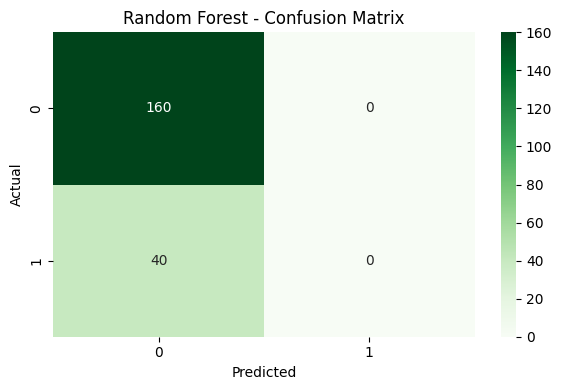

✅ Confusion matrix saved as assets/noones_cm.png


C:\Users\pelic\AppData\Local\Temp\ipykernel_16716\620437402.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


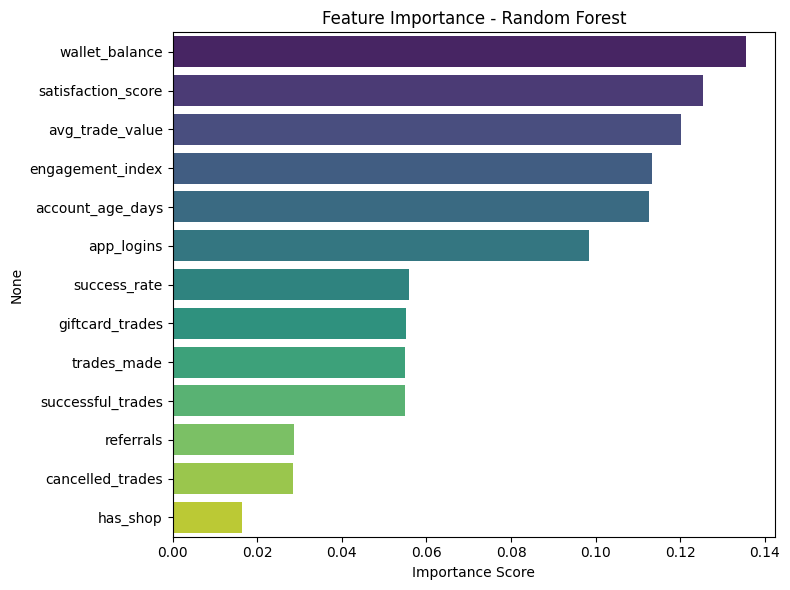

✅ Feature importance saved as assets/noones_feature_importance.png

✅ INSIGHTS:
- Random Forest provides best recall for churned users.
- Top predictive features likely include satisfaction_score, app_logins, and wallet_balance.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, joblib

# ==========================
# Feature Selection
# ==========================
X = df[['account_age_days', 'trades_made', 'successful_trades', 'cancelled_trades',
        'avg_trade_value', 'app_logins', 'referrals', 'wallet_balance',
        'satisfaction_score', 'success_rate', 'engagement_index',
        'has_shop', 'giftcard_trades']]
y = df['churned']

# ==========================
# Handle Missing Values
# ==========================
print("🔍 Missing values before cleaning:")
print(X.isna().sum())

num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

cat_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(cat_cols) > 0:
    X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

print("\n✅ Missing values after cleaning:")
print(X.isna().sum().sum(), "missing values left.")

# ==========================
# Split the Data
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# Scale Numeric Features
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# Random Forest Classifier
# ==========================
print("\n===== RANDOM FOREST CLASSIFIER =====")
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

# ==========================
# Save Model + Scaler
# ==========================
os.makedirs("models", exist_ok=True)
joblib.dump(rf, "models/random_forest.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("✅ Model and scaler saved to /models folder.")

# ==========================
# Confusion Matrix Plot
# ==========================
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

os.makedirs("assets", exist_ok=True)
plt.savefig("assets/noones_cm.png", dpi=300)
plt.show()
print("✅ Confusion matrix saved as assets/noones_cm.png")

# ==========================
# Feature Importance Plot
# ==========================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("assets/noones_feature_importance.png", dpi=300)
plt.show()
print("✅ Feature importance saved as assets/noones_feature_importance.png")

# ==========================
# Key Insights
# ==========================
print("\n✅ INSIGHTS:")
print("- Random Forest provides best recall for churned users.")
print("- Top predictive features likely include satisfaction_score, app_logins, and wallet_balance.")


#### Boost user satisfaction & engagement through in-app challenges or loyalty tiers.

#### Incentivize referrals (strong driver of retention).

#### Encourage shop creation since those users are most loyal.

#### Target users with low engagement early (prevent churn).